## __Problem Statement:__

#### The age of abalone is determined by cutting the shell through the cone, staining it,
#### and counting the number of rings through a microscope -- a boring and time-consuming task.
#### Other measurements, which are easier to obtain, are used to predict the age.
#### Further information, such as weather patterns and location (hence food availability)
#### may be required to solve the problem.

## We have to predict the age of of abalone which is continuous data .
## Let's assume that we have __Regression problem__.


### ----------------
#### First I am importing some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'

In [3]:
## loading the data
data = pd.read_csv(url)

In [4]:
## let's run code to display all the column
pd.options.display.max_columns = None

In [5]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.shape

(4177, 9)

In [7]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### we can see that our data has no missing values 

In [8]:
## Let's  remove the sex column, it is not import to predict the age

data.drop('Sex',axis=1, inplace=True)

In [9]:
## let's verify if the column Sex is removed 
data.shape

(4177, 8)

In [10]:
## let's describe the data and see the statistical distribution of each column.
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:y

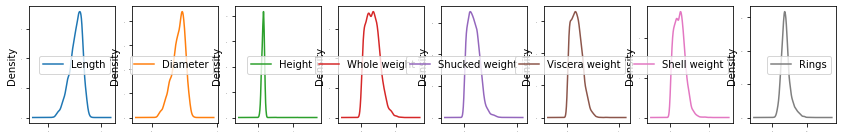

In [11]:
## Let's visualize our dataset and see the distribute
data.plot(kind = 'density',subplots = True,layout =(6,11),
              sharex = False,fontsize=1,figsize =(20,15))


## We can see clearly that our the columns are almlost normally distributed 
#### ----------------------------------

In [12]:
## Let's seperate our data into feature and label

X = data.drop('Rings',axis=1)
y = data.Rings

In [13]:
import warnings
warnings.filterwarnings('ignore')

#### ------------------------------------------------
### Let's check also the skewness using distplot


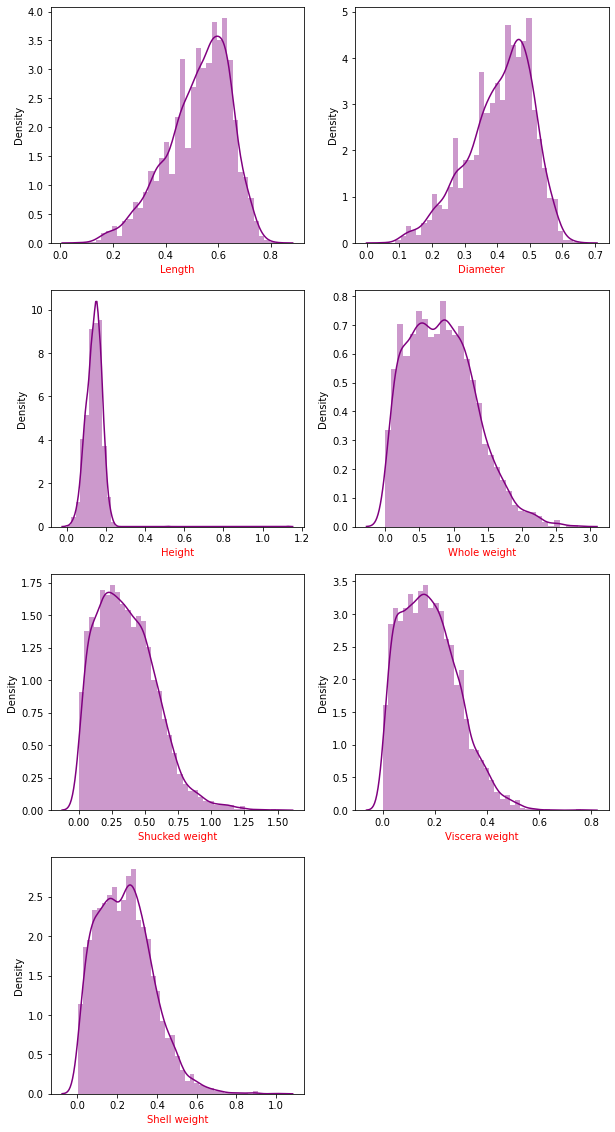

In [14]:
plt.figure(figsize=(10, 20))

graph = 1

for column in X:
    if graph <= 7:
        ax = plt.subplot(4,2,graph)
        sns.distplot(X[column],color='purple')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

## ----------------------------------------
## let's remove the outliers

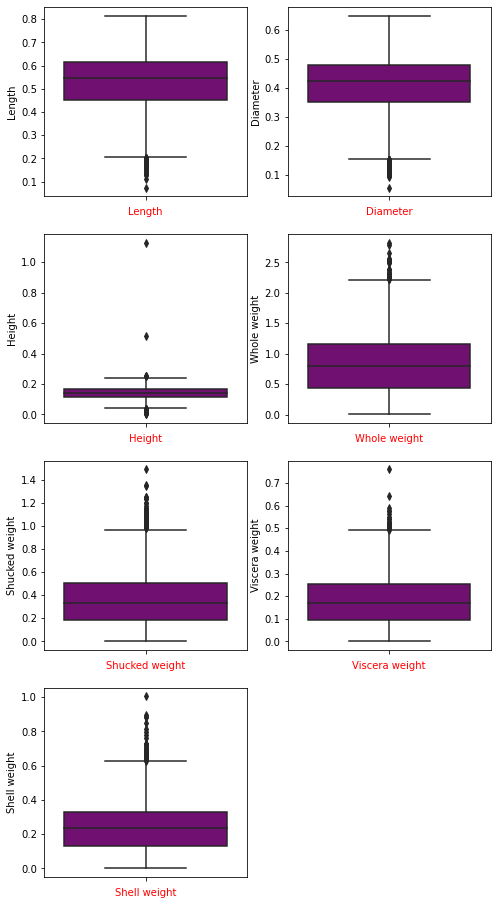

In [15]:

## Let's use the box see if there is any outliers for the features

plt.figure(figsize=(8, 16))

graph = 1

for column in X:
    if graph <= 7:
        ax = plt.subplot(4,2,graph)
        sns.boxplot(y = X[column],orient='h',color='purple')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

## From Boxplot, We can see that some column have higher side Outliers and some have lower side Outliers.

### Outliers Dectection Formula
#### Higher side ===> Q3 + (1.5 * IQR)
#### lower side ===> Q1 - (1.5 * IQR)
#### IQR = Inter Quantile Rate = Q3 - Q1

In [16]:
X.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

### The columns {'Height', 'Whole weight','Shucked weight','Viscera weight' } have Outliers higher side  and { 'Length', 'Diameter' } have Outliers but at lower side from the Boxplot.

#### -------------
### let's remove the outliers Higher side first

In [17]:
# Finding the IQR (Inter Quantile Range) to identify Outliers

# 1st Quantile
q1 = data.quantile(0.25)

# 3rd Quantile
q3 = data.quantile(0.75)

# IQR 
iqr = q3 -q1

In [18]:
# Validation one outlier

Height_high = (q3.Height + (1.5 *iqr.Height))
Height_high

0.24000000000000002

### This means from the column Height all the record values greather than 0.24 (Height > 0.24) are outlier higher side

In [19]:
## let's get the indexes of all those column
indexes = np.where(data['Height'] > Height_high)
indexes

(array([1417, 1428, 1763, 2051, 2179]),)

In [20]:
## Let's verify it

print(data['Height'].iloc[1417])
print(data['Height'].iloc[1428])

0.515
0.25


### We can see clearly that the both record have  Height values greater than 0.24

In [21]:
# Let's drop those indexes from the dataset

data = data.drop(data.index[indexes])

In [22]:
## let's reset the index

data.reset_index(drop=True)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4167,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4168,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4169,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4170,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
## for the Whole weight column

indexes = np.where(data['Whole weight'] > (q3['Whole weight'] + (1.5 * iqr['Whole weight'])))
data = data.drop(data.index[indexes])
data.reset_index(drop=True)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4139,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4140,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4141,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4142,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
## for the 'Shucked weight' column

indexes = np.where(data['Shucked weight'] > (q3['Shucked weight'] + (1.5 * iqr['Shucked weight'])))
data = data.drop(data.index[indexes])
data.reset_index(drop=True)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4115,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4116,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4117,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4118,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [25]:
## for the 'Viscera weight' column

indexes = np.where(data['Viscera weight'] > (q3['Viscera weight'] + (1.5 * iqr['Viscera weight'])))
data = data.drop(data.index[indexes])
data.reset_index(drop=True)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4107,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4108,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4109,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4110,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [26]:
# For the column Shell weight



indexes = np.where(data['Shell weight'] > (q3['Shell weight'] + (1.5 * iqr['Shell weight'])))
data = data.drop(data.index[indexes])
data.reset_index(drop=True)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4083,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4084,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4085,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4086,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## -------------------------
### Let's drop the Outliers for lower side from 'Length', 'Diameter' columns
### lower side ===> Q1 - (1.5 * IQR)¶

In [27]:
## for the column Length

indexes = np.where(data['Length'] < (q1.Length - (1.5 * iqr.Length)))
data = data.drop(data.index[indexes])
data.reset_index(drop=True)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4034,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4035,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4036,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4037,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
# for the column Diameter

indexes = np.where(data['Diameter'] < (q1.Diameter- (1.5 * iqr.Diameter)))
data = data.drop(data.index[indexes])
data.reset_index(drop=True)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4022,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4023,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4024,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4025,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
# for the column Height

indexes = np.where(data['Height'] < (q1.Height- (1.5 * iqr.Height)))
data = data.drop(data.index[indexes])
data.reset_index(drop=True)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4019,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4020,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4021,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4022,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### ---------------------------
### let's verify if the Outliers are removed



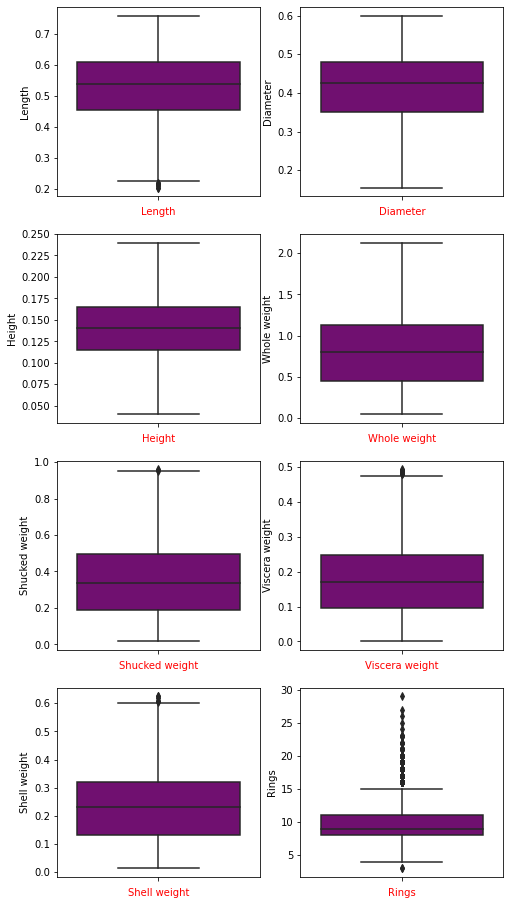

In [30]:
plt.figure(figsize=(8, 16))

graph = 1

for column in data:
    if graph <= 8:
        ax = plt.subplot(4,2,graph)
        sns.boxplot(y = data[column],orient='h',color='purple')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

### We can see that there no longer Outliers for the features attributes


### ---------------------------
### let's check again if our data features are skew or not ..

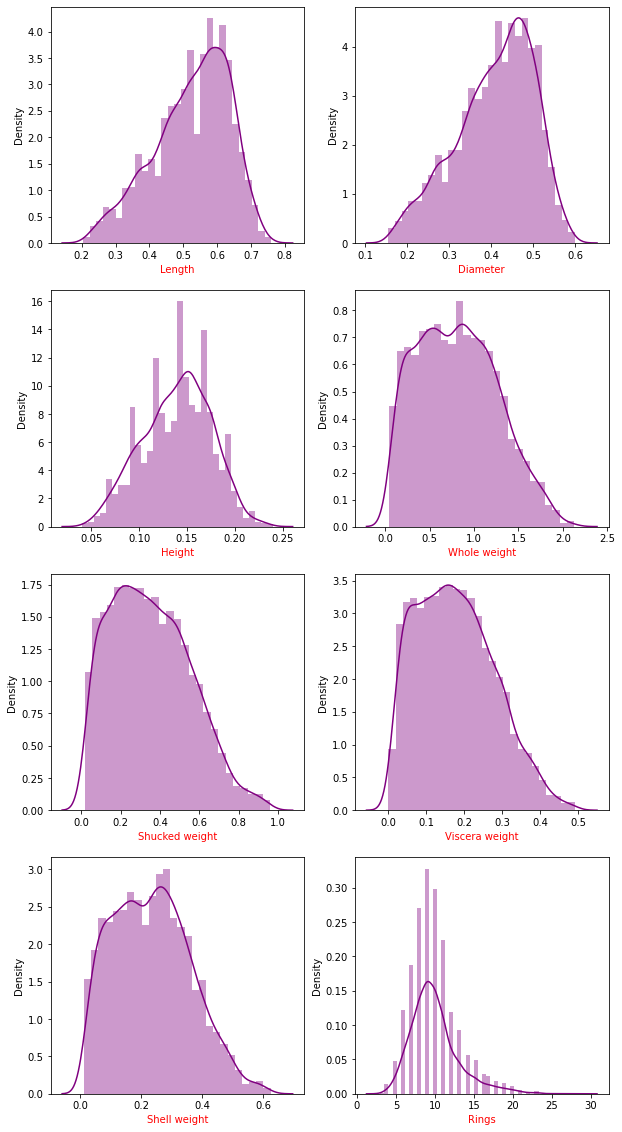

In [31]:
plt.figure(figsize=(10, 20))

graph = 1

for column in data:
    if graph <= 8:
        ax = plt.subplot(4,2,graph)
        sns.distplot(data[column],color='purple')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

### We can see that the skewness is remove as well.

### ---------------------------------------------------------
## Before we build the model see the relation between our __label data__ and __features data__ using SCatter plot

In [32]:
## seperating the dataset into features and label.

X_ = data.drop('Rings',axis=1)
y_ = data.Rings

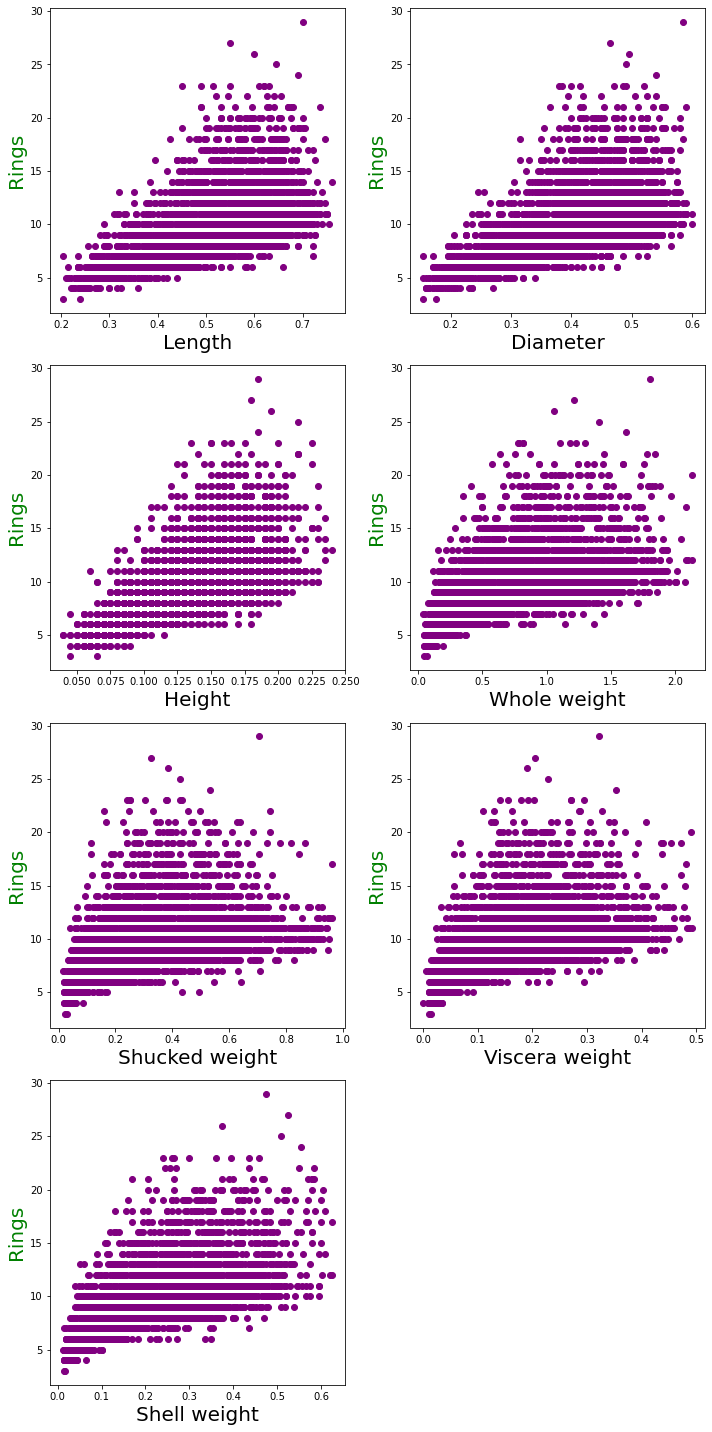

In [33]:
plt.figure(figsize=(10,20), facecolor='white')
plotnumber = 1

for column in X_:
    if plotnumber <= 7:
        ax = plt.subplot(4,2, plotnumber)
        plt.scatter(X_[column],y_, color ='purple')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Rings', fontsize = 20,color='green' )
        
    plotnumber+=1
plt.tight_layout()

### Great we can see that the relationship between the label data and feature look __fairly and clearly linear.__ from the scatter plot

## __Thus our linearity assumption is satisfied.__

## --------------------------- ---------------------------
## Let's build our Model now Using __LinearRegression Algorithm.__

In [34]:
## Import some important libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV


In [69]:
## let's standarized the the feature data
scaler = StandardScaler()

X_scaler = scaler.fit_transform(X_)


In [70]:
X_scaler

array([[-0.63224492, -0.47457369, -1.23996973, ..., -0.63148282,
        -0.75359153, -0.66512589],
       [-1.58057862, -1.56243409, -1.38002975, ..., -1.25144156,
        -1.27093276, -1.29603227],
       [ 0.0451363 ,  0.12374953, -0.11948957, ..., -0.47277338,
        -0.35449972, -0.1919461 ],
       ...,
       [ 0.67735877,  0.72207275,  1.8413507 , ...,  0.86137782,
         1.08420162,  0.58091423],
       [ 0.90315251,  0.83085879,  0.30069049, ...,  0.888656  ,
         0.82306747,  0.48627827],
       [ 1.67085123,  1.59236107,  1.56123066, ...,  2.94443917,
         1.96121819,  2.05565791]])

In [71]:
## let's instantiate the LinearRegression

reg = LinearRegression()

In [72]:
## split features data into train and test
x_train,x_test,y_train,y_test = train_test_split(X_scaler,y_,test_size=0.25, random_state=55)

In [73]:
## let's fit the model with the data
reg.fit(x_train, y_train)

LinearRegression()

In [74]:
### train score 

reg.score(x_train, y_train)

0.5128369949052087

In [75]:
reg.score(x_test,y_test)

0.5069439146438508

In [76]:
y_pred = reg.predict(x_test)

Text(0.5, 1.0, 'Actual VS Predicted')

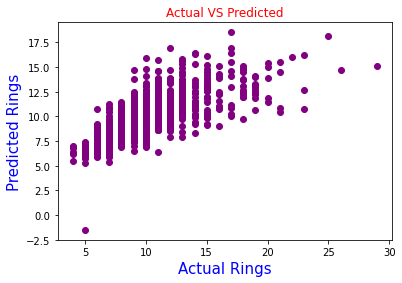

In [77]:
plt.scatter(y_test, y_pred,color ='purple')
plt.xlabel('Actual Rings',color='blue',fontsize =15)
plt.ylabel('Predicted Rings',color='blue',fontsize =15)
plt.title('Actual VS Predicted',color='r')

## ---------------------
### Let'st go for Hyperparametric turning and see if we can improve the score of the model

In [78]:
# LassoCV will return best alpha after max iteration
# Normalize  is subtracting the mean and dividibg by the L2-norm


lassocv = LassoCV(alphas=None, max_iter=1000, normalize=True)
lassocv.fit(x_train, y_train)


LassoCV(normalize=True)

In [79]:
alpha = lassocv.alpha_

In [80]:
alpha

3.4310352105409806e-05

In [81]:
## now that we have the best parameter, let's use Lasso regression
## and see how well our data fitted  before 

lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.4310352105409806e-05)

In [82]:
## let's see train data  score 

lasso_reg.score(x_train,y_train)

0.5128369548457299

In [83]:
## test score

lasso_reg.score(x_test,y_test)

0.5069287058809073

# ------------------------ 
### Let's check again Using Ridge regression model


#### RidgeCV will return best alpha and coefficients after perfoming n across validations.

In [84]:
#### across validations.

ridgecv = RidgeCV(alphas= np.arange(0.01,1,0.01), normalize=True)

In [85]:
ridgecv.fit(x_train, y_train)


RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        normalize=True)

In [86]:
alpha_ = ridgecv.alpha_

In [87]:
alpha_

0.01


### The result is alpha = 0.01, It is called learning rate.

In [88]:
ridge_model = Ridge(alpha=alpha_)

In [89]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [90]:
### train encore 

ridge_model.score(x_train,y_train)

0.5128369907014023

In [91]:
## test encore 

ridge_model.score(x_test,y_test)

0.5069403506953947



## Concluson: from all the above verifications we can say that our model is not overfiting and the score 50%.


#### --------------------------------------

### Again let's build a secnod model using:__AdaBoostRegressor Algorithum__

In [58]:
## let's import some libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor


In [59]:
## instantiate AdaBoostRegressor

ada = AdaBoostRegressor()

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X_scaler,y_,test_size=0.30, random_state=165)

In [93]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [94]:
y_pred= ada.predict(x_train)

In [95]:
### train encore 

print('R square score',metrics.r2_score(y_train,y_pred))

R square score 0.29809501302579133


In [96]:
# test score 
y_pred_ = ada.predict(x_test)
print('R square score',metrics.r2_score(y_test,y_pred_))


R square score 0.29656586099623905


In [97]:
dt = DecisionTreeRegressor(max_depth=5)


In [98]:
params = {'n_estimators':[10,20,30,40,47,49,50,52,55,60,62],
          'learning_rate':[0.20,0.30,0.35,0.40,0.45,0.55,0.57]}

In [100]:
rnd_search = RandomizedSearchCV(AdaBoostRegressor(),cv=8,param_distributions = params)

In [101]:
rnd_search.fit(x_train,y_train)


RandomizedSearchCV(cv=8, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.2, 0.3, 0.35, 0.4,
                                                          0.45, 0.55, 0.57],
                                        'n_estimators': [10, 20, 30, 40, 47, 49,
                                                         50, 52, 55, 60, 62]})

In [102]:
## let's check the best estimators

rnd_search.best_estimator_

AdaBoostRegressor(learning_rate=0.57, n_estimators=10)

In [103]:
## let's build again the model using the known estimators

ada_ = AdaBoostRegressor(base_estimator=dt,learning_rate=0.57,n_estimators=10)

In [104]:
ada_.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.57, n_estimators=10)

In [107]:
## train encore 

ada_.score(x_train,y_train)

0.5684858303383674

In [105]:
### let's predict the x_train

y_pred1 = ada_.predict(x_train)

In [106]:
print('\n------Accuracy post turning-------\n')
print(metrics.r2_score(y_train,y_pred1))


------Accuracy post turning-------

0.5684858303383674


In [108]:
y_test_pred = ada_.predict(x_test)

In [109]:
print('\n*****Accuracy post turning****\n')

print(metrics.r2_score(y_test,y_test_pred))


*****Accuracy post turning****

0.46403169709361114


## Adaboost Regressor is not giving better Accuracy.

##### ******* ******* ******* ******* *******
## CONCLUSION: I have build tow model using LinearRegression and Adaboost Regressor after parameter turning I found out that
## LinearRegression fit better my dataset white 50% Accuracy.



### --------------------------
## saving the model

In [111]:
import joblib

In [112]:
joblib.dump(ridge_model,"Rings_prediction.pkl")

['Rings_prediction.pkl']

In [113]:
ls

Rings_prediction.pkl  project_2.ipynb
